In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('gpu')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_directory = '/content/drive/MyDrive/CNN_IM'

In [ ]:
os.listdir(data_directory)

['puppies', 'tito']

In [ ]:
img_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for img_class in os.listdir(data_directory):
  for image in os.listdir(os.path.join(data_directory, img_class)):
    img_path = os.path.join(data_directory, img_class,image)
    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in img_ext:
        print('Image not in extension List {}'.format(img_path))
        os.remove(img_path)
    except Exception as e:
      print('Issue with image {}'.format(img_path))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_directory)

Found 210 files belonging to 2 classes.


In [ ]:
data_itr = data.as_numpy_iterator()

In [ ]:
batch = data_itr.next()

In [ ]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

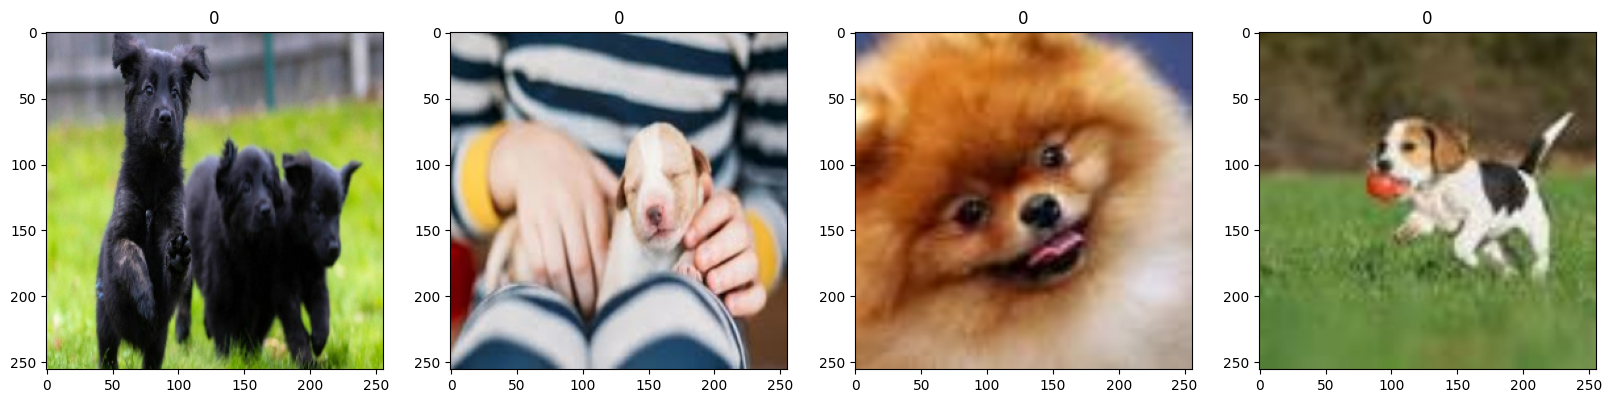

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled_data = data.map(lambda x,y:(x/255,y))
scaled_data.as_numpy_iterator()

In [ ]:
len(scaled_data)

7

In [ ]:
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)+1
test_size = int(len(scaled_data)*0.1)+1


In [ ]:
train_size, val_size, test_size

(4, 2, 1)

In [ ]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logs_directory = '/content/drive/MyDrive/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs_directory)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [ tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 21s 2s/step - loss: 0.5843 - accuracy: 0.8125 - val_loss: 0.4418 - val_accuracy: 0.8438
Epoch 2/20
4/4 [==============================] - 5s 855ms/step - loss: 0.3983 - accuracy: 0.8750 - val_loss: 0.2106 - val_accuracy: 0.9375
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.4227 - accuracy: 0.8281 - val_loss: 0.3212 - val_accuracy: 0.9062
Epoch 4/20
4/4 [==============================] - 5s 865ms/step - loss: 0.4288 - accuracy: 0.8125 - val_loss: 0.3101 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.3566 - accuracy: 0.8438 - val_loss: 0.3288 - val_accuracy: 0.8594
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.2925 - accuracy: 0.8672 - val_loss: 0.2938 - val_accuracy: 0.8281
Epoch 7/20
4/4 [==============================] - 7s 966ms/step - loss: 0.2689 - accuracy: 0.8672 - val_loss: 0.2840 - val_accuracy: 0.8750
Epoch 8/20
4/4 [===============

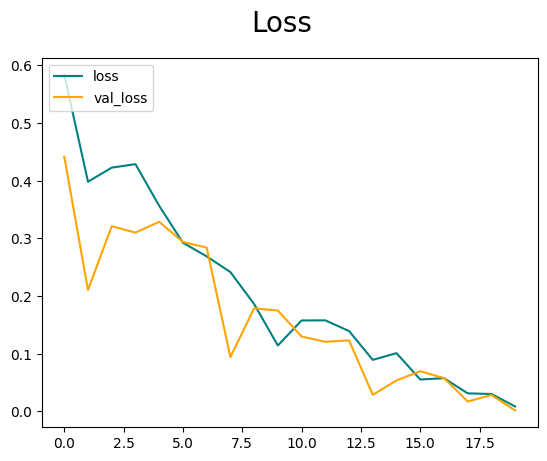

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

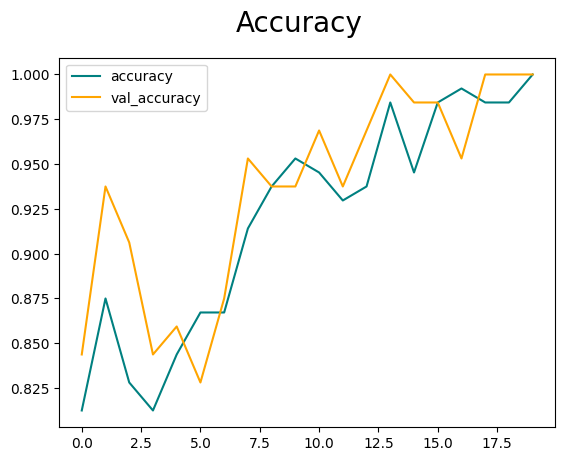

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  ba.update_state(y, yhat)

1/1 [==============================] - 0s 336ms/step


In [ ]:
print(pre.result().numpy())
print(re.result().numpy())
print(ba.result().numpy())

1.0
1.0
1.0


In [ ]:
img = cv2.imread('/content/drive/MyDrive/CNN_IM/tito/116111936_3169950823112318_946311377127529021_n.jpg')


In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

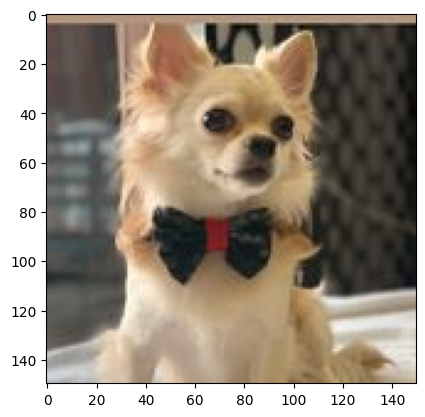

In [ ]:
display_img = cv2.imread('/content/drive/MyDrive/CNN_IM/tito/116111936_3169950823112318_946311377127529021_n.jpg')
plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 20ms/step


array([[0.7741842]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print("The picture is of Tito!! 👾")
else:
  print("This picture is of some other nice dog.")

The picture is of Tito!! 👾


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/CNN_IM/models/imageclassifier.h5')

In [ ]:
new_model = load_model('/content/drive/MyDrive/CNN_IM/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 141ms/step


array([[0.7741842]], dtype=float32)